In [1]:
arreglo <- as.factor(rep(c(1,2),each=24))

In [2]:
operador <- as.factor(rep(c(1,2,3,4),12))

In [3]:
dispositivo <- as.factor(rep(rep(c(1,2,3),each=8),2))

In [4]:
y <- c(22,23,28,25,24,24,29,23,30,29,30,27,27,28,32,25,
       25,24,27,26,21,22,25,23,26,27,28,24,28,25,25,23,
       29,30,24,28,28,27,23,30,27,26,24,28,25,24,27,27)

ponemos en un DataFrame los datos:

In [5]:
datos=data.frame(cbind(arreglo,operador,dispositivo,y))
datos

arreglo,operador,dispositivo,y
<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,22
1,2,1,23
1,3,1,28
1,4,1,25
1,1,1,24
1,2,1,24
1,3,1,29
1,4,1,23
1,1,2,30


Definimos cuáles actores son fijos y cuáles aleatorios:

In [ ]:
library(Matrix)
library(GAD)

In [8]:
arreglo <- as.factor(arreglo)
arreglo <- as.fixed(arreglo)
dispositivo <- as.factor(dispositivo)
dispositivo <- as.fixed(dispositivo)
operador <- as.factor(operador)
operador <- as.random(operador)

Definimos el modelo:

In [9]:
mod1 <- lm(y~arreglo+dispositivo+operador%in%arreglo+arreglo:dispositivo+operador:dispositivo%in%arreglo)

In [10]:
gad(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
arreglo,1,4.083333,4.083333,0.3406721,0.580704150
dispositivo,2,82.791667,41.395833,7.5455696,0.007553076
arreglo:operador,6,71.916667,11.986111,5.1369048,0.001605804
arreglo:dispositivo,2,19.041667,9.520833,1.7354430,0.217769146
arreglo:dispositivo:operador,12,65.833333,5.486111,2.3511905,0.036043355
Residual,24,56.000000,2.333333,NA,NA


La interacción operador:dispositivo es significativa, lo que implica es que la calificación del operador dependen del dispositivo que use, o que un dispositivo no es mejor que otro, ya que depende del operador que lo use.

Además, la anidación de operador dentro de arreglo es significativo, lo cual implica que no todos los operadores rinden igual, puede ser producto del tiempo que llevan trabajando, o de la capacitación que recibieron.

## Estimando los componentes de varianza 

Componente de varianza para operador dentro del arreglo del sitio del trabajo, **operador(arreglo)**:

In [15]:
CM_o_a = gad(mod1)['arreglo:operador','Mean Sq']

In [18]:
CME = gad(mod1)['Residual','Mean Sq']

In [23]:
gad(mod1)['Df']

,Df
,<int>
arreglo,1
dispositivo,2
arreglo:operador,6
arreglo:dispositivo,2
arreglo:dispositivo:operador,12
Residual,24


In [22]:
var_o_a = (CM_o_a-CME)/gad(mod1)['arreglo:operador','Df']

componente de varianza para interacción del dispositivo por operadores dentro del arreglo del sitio del trabajo, **dispositivo*operador(arreglo)**:

In [27]:
CM_d_o = gad(mod1)['arreglo:dispositivo:operador','Mean Sq']

In [30]:
var_d_o = (CM_d_o-CME)/gad(mod1)['dispositivo','Df']

In [37]:
vars = c(var_o_a, var_d_o,CME)
vars

[1] 1.608796 1.576389 2.333333

In [38]:
porcentajes<-round(100*vars/sum(vars),2)
porcentajes

[1] 29.15 28.57 42.28

## Gráfica de pastel 

In [39]:
library(plotrix)

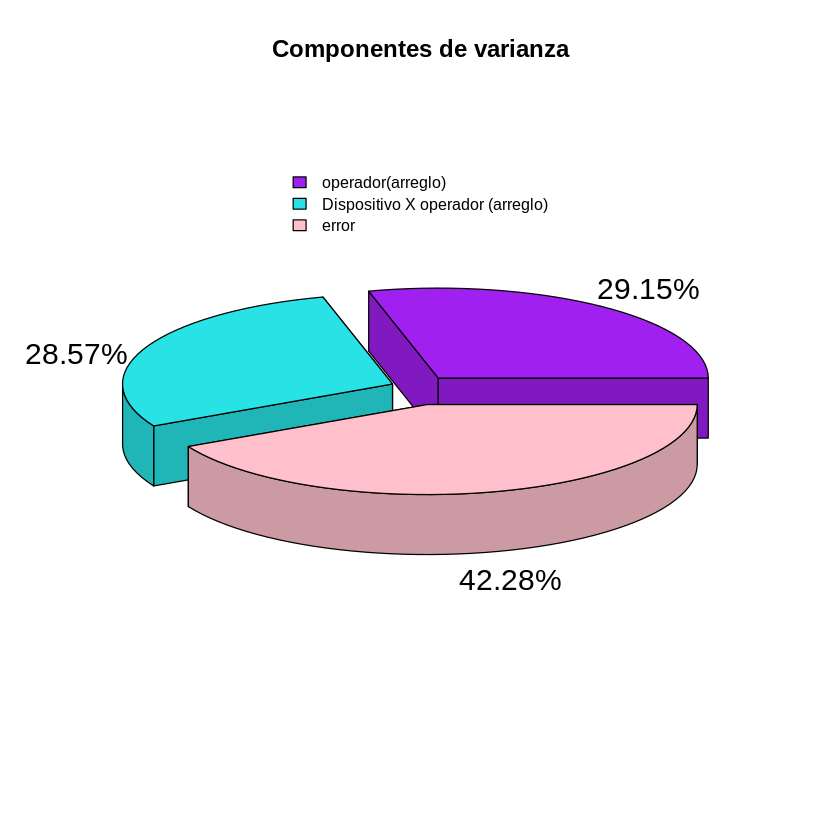

In [46]:
etiqueta<-paste(porcentajes,"%",sep = "")
colores<-c("purple","541","pink")
pie3D(porcentajes,radius=0.9,explode=0.1,main="Componentes de varianza", col=colores, labels = etiqueta)
legend("top", inset = 0.1, c("operador(arreglo)","Dispositivo X operador (arreglo)","error"),cex=0.8,fill=colores,bty = 'n')

## Verificando los supuestos del modelo

### Independencia de los residuos 

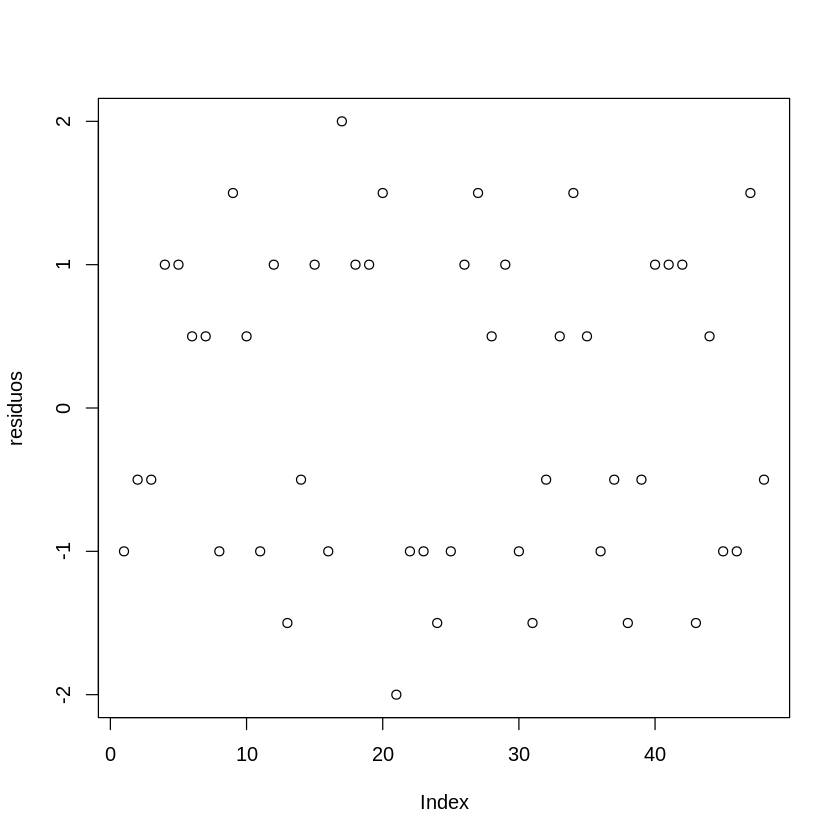

In [48]:
residuos<-c(mod1$res)
plot(residuos)

In [ ]:
library(tseries)

#### Prueba de rachas 

In [50]:
runs.test(as.factor(mod1$residual>0))


	Runs Test

data:  as.factor(mod1$residual > 0)
Standard Normal = -1.1672, p-value = 0.2431
alternative hypothesis: two.sided


Como $p > 0.05$, no se rechaza $H_0$, por lo que los residuos son independientes.

### Normalidad de los errores

#### Gráfica normal 

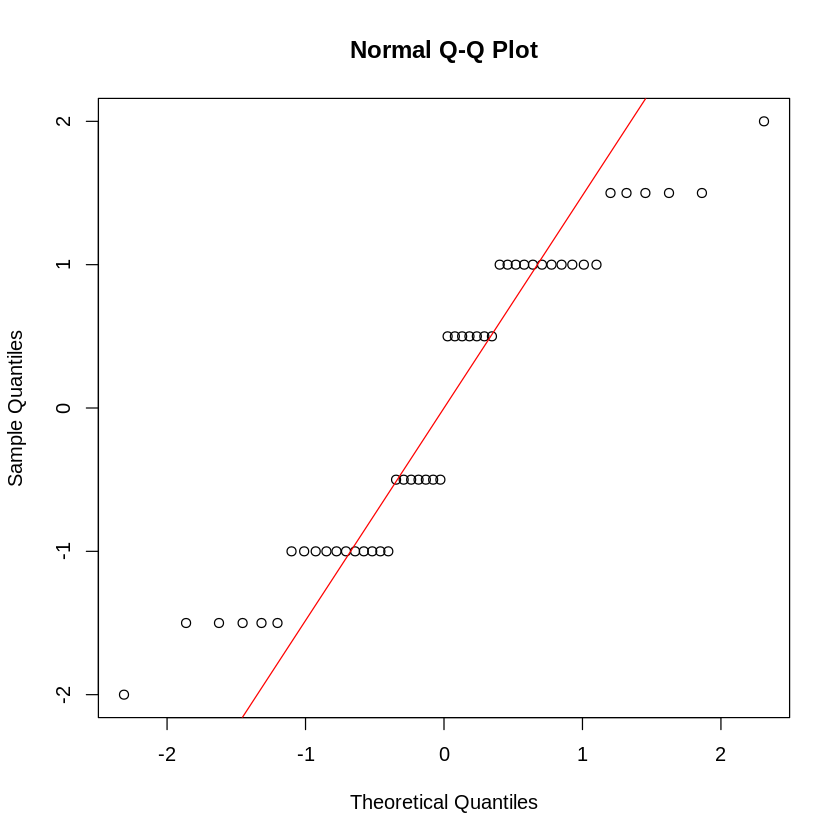

In [55]:
qqnorm(residuos)
qqline(residuos, col = 'red')

#### Histograma 

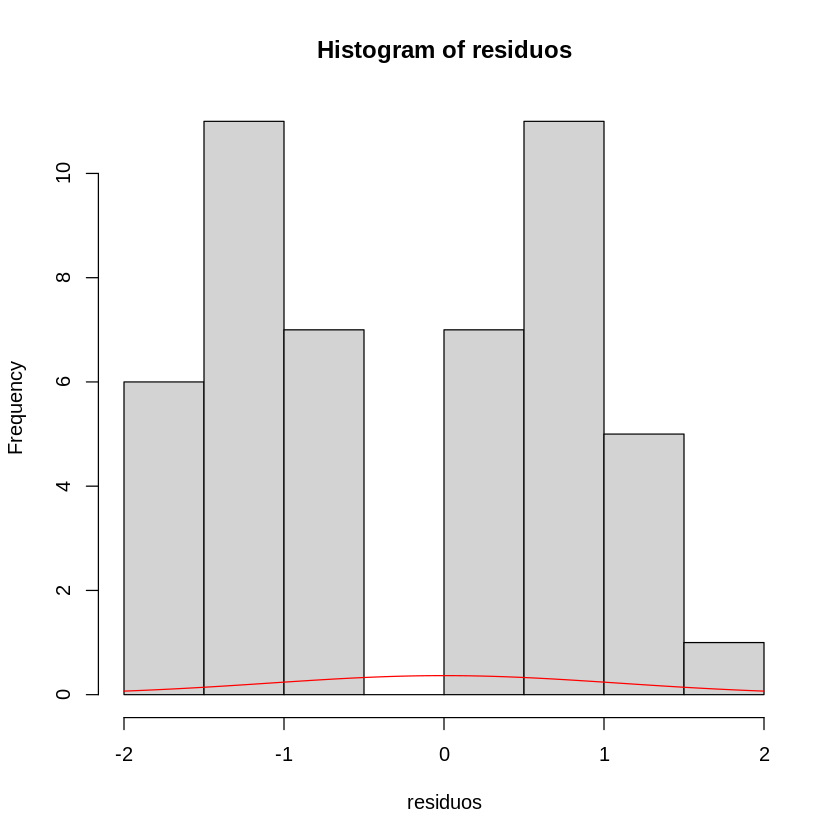

In [58]:
hist(residuos)
x = residuos
m = mean(x)
s = sd(x)
curve(dnorm(x, mean = m, sd = s), col = 'red', add = TRUE)

#### Caja de bigotes 

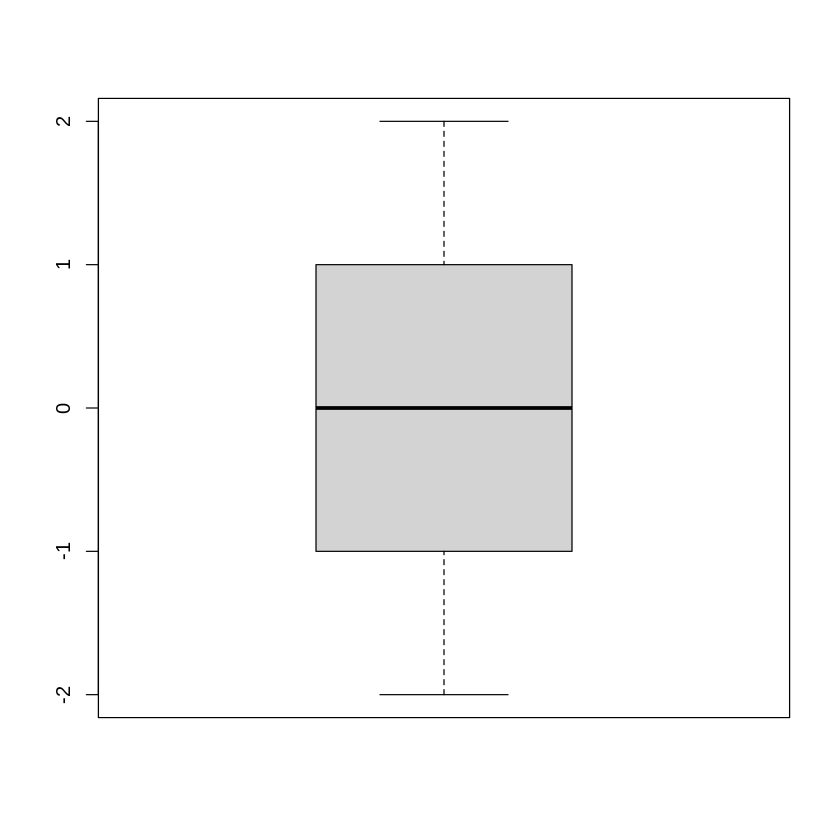

In [59]:
boxplot(residuos)

#### Prueba de normalidad

In [60]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.90691, p-value = 0.001059


En este caso, $p < 0.05$, así que los residuos no tienen una distribución normal.